## Data Gathering 

### How would you reliably build a database of the name, email address and school of every middle and high school teacher in America?


There are three major strategies that could be deployed here :

##### Build a relationship with the gate keepers : 

Since every teacher has to go through a certification process to be able to teach, we could build relationships with the Department of Education, State / City Certification boards. The data obtained from this source will probably be standardized and will include the teachers name and maybe their email address. Identifying which schools the teachers currently teach at might be a challenge since teachers will move around. One of the drawbacks with this strategy are that establishing those relationship could be hard and bureaucratic and since there is a lot of fragmentation in the educational systems at the middle/high school level when you compare different states (eg ..New York vs Montana). This strategy may be not scalable either. Another drawback is that some of the certifications boards may not want to release this data due to privacy concerns and even if they do, the data could alredy be stale.

##### Build a system that will automate, collect and sanitize this data from public sources :

This strategy will require a lot or pre-planning but if executed right, it will be scalable in the long run. Here you'll need to identify all the Middle and High schools in the country. The vast majority of these schools will probably have a website with a section of the site earmarked as the teacher / faculty directory (this is usually at the root level), that will usually list teachers' names and email addresses. 

With just the institution name, you can deploy a script that searches google for that schools' name and picks the most probable link to the schools website. You could bring a human into the process for searches that could not identify any situable links or you could just farm the entire process to Mechanical Turk. 

So your database will start with the institution/school name and their corresponding websites at the top level and for each institution you can identify the page that stores the faculty directory information and then extract the teacher names and email. This data may be presented as a html table, pdf, an image, etc. There will have to be some testing here to find out the few end points that give the most coverage. Identifying the faculty directory page could be the job a classification algorithm that will learn to classify root pages on a schools website as faculty directory / Not faculty directory based on theor content. The classification  algorithm will be seeded with some hand collected training data

Some of the decisions that will need to be made here also include the data storage medium - relational vs NOSQL, how this extraction pipeline can be easily modified and extended, having a name de-duplication strategy in place. The majority of teachers at the middle / high school level in the US are females and these individuals could marry and/or change their last names for other reasons, teach at diffenent schools and maybe even different states over the course of their teaching career.  

This strategy will enable you have a pipeline that can be easily rebuilt at the flip of a switch, the update cycle here will be much shorter and will require just re-running the script at the beginning of each school term and identfyng the diffs to identify teachers that have different information or have changed schools. This could also fit as a module in the current WyzAnt infrastructure 

##### Have hybrid system that utilized the best from the other twoaforementioned strategies : 

This strategy will be a hybrid of the first two. It will tahe the best features from both,, eg. for schools without a website , you could then reach out to the Local / State Cetification Board to get the required data  


## Data Modeling 

### What inputs would you need to build a comprehensive growth model for WyzAnt?


To build a comprehensive growth model we first need to understand what exactly WyzAnt defines as growth.

Metrics of growth can be broadly classified into the following areas : Acquisition, Activation, Retention, Referral, Revenus. A comprehensive growth strategy will be one that will make improvements in each of those categories 

- Acquisition : this invloves growing the number of students and tutors from different the acquisition channels. This could involve spending on advertising, identifying the possible groups that could be interested in WyzAnts' services as either students or tutors and reaching out to them,  

- Activation : For those users (students or tutors) on the platform, increase the number of them that have a positive experience/outcomes. What a positive outcome looks like will vary widely across different tutors and students. It could be helpful having a customer success team in place that ensures that tutors inquiries are addressed timely or payments are made on time or students are matched to the right tutor, etc. This difficult thing here wwill be to establish a baseline and a way to actually track success.

- Retention : Here users (students or tutors) on the platform will like it enough to come back and continue using the platform  

- Retention : Here users (students or tutors) on the platform will like it enough that they'd refer their friends to the platform (students/parents) or refer other tutors that are maybe using a rival service or none at all 

- Revenue : For those users (students or tutors) on the platform find ways to better monetize them. This could be everything from making better tutors - students matches, adjusting WyzAnt commission fees to encourage more engagements and to building out new revenue channels

A comprehensive growth strategy will seek to make improvements in each of the different categories. Some of the categories like Acquisition and Activation will be very capital intensive. Whereas the others like Retention, Retention and Revenue could still require some capital investment but a lot of the progress here will be from  building a capacity to collect and analyze all the data from interactions on the platform and constantly experimenting to discover those hidden opportunities (if there are any) and tying those back to relevant business metrics.

### How would you double lesson volume in 3 months?


There could be several ways to double lesson volume in 3 months
- Increase the number of students/tutors on the platform accordingly. So even if the average number of lessons a tutor delivers stays constant, you'll have more tutors/students on the platform. Increasing this number about 26% month over month for 3 consecutive months will double the lesson volume provided everything else stays the same

- Improve the student - tutor matching system. This will indirectly increase the average number of lessons a tutor  delivers. You need to increase this metric about 26% month over month for 3 consecutive months to double the lesson volume

## Exploratory 

#### The Resources section of WyzAnt.com is a massive source of inbound traffic with relatively few conversions and a very high bounce rate. How could you use data (and what would you need) to increase time on site and make it more engaging?

The Resources page probably gets a lof of traffic because it has a lot of content spread across Answers, Blogs, Files, Forums, Lessons and Videos. To increase time spent on the Resources section of the site and conversions, WyzAnt will have to personalize the target pages with more relevant content.

To do this, you'll need data on how people get to the Resources page (organic, referral, search, social, etc), what queries they search for

## Problem Set

In [112]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [113]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [114]:
## Load Dara 
data = pd.read_csv('Wyzant/data-set-csv.csv')
del data['Unnamed: 11']
print len(data)

11553


In [115]:
data.head(10)

,City,State,Population,NumSearchers,AvgNumSearchResults,AvgMinSearchResults,AvgMaxSearchResults,NumSearchClicks,NumLeads,NumTutorsMailed,NumRelationsWithLessons
0,City1,State25,256280,194,8.4890,8.1155,8.8442,354,33,34,6
1,CIty2,State25,10195,1,5.0000,5.0000,5.0000,1,0,0,0
2,City3,State25,107,2,8.5000,8.5000,8.5000,5,1,0,0
3,City4,State25,6,1,319.0000,319.0000,319.0000,1,0,0,0
4,City5,State25,31,27,18.0440,16.0714,19.3571,48,6,5,1
5,City6,State25,1,1,1.0000,1.0000,1.0000,2,1,1,0
6,City7,State25,7416,22,17.9472,17.8695,18.1304,41,6,4,1
7,City8,State25,31275,2,93.5000,93.5000,93.5000,8,0,0,0
8,City9,State25,375,2,40.5000,40.5000,40.5000,2,0,0,0
9,City10,State25,282,1,371.0000,371.0000,371.0000,1,1,1,0


In [116]:
data.describe()

,Population,NumSearchers,AvgNumSearchResults,AvgMinSearchResults,AvgMaxSearchResults,NumSearchClicks,NumLeads,NumTutorsMailed,NumRelationsWithLessons
count,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000
mean,18727.988055,37.893621,72.163349,65.077621,80.067611,114.164719,7.487406,6.985631,1.273003
std,94412.884286,177.518645,130.070020,116.646536,146.879311,613.063243,36.548630,33.836006,5.939510
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,100.000000,1.000000,8.440000,7.000000,9.000000,2.000000,0.000000,0.000000,0.000000
50%,705.000000,4.000000,25.500000,23.000000,27.181800,9.000000,1.000000,1.000000,0.000000
75%,6739.000000,20.000000,75.514900,69.095700,82.666600,50.000000,4.000000,4.000000,1.000000
max,3137491.000000,7481.000000,1727.000000,1727.000000,1727.000000,30779.000000,1503.000000,1429.000000,247.000000


#### Does WyzAnt have a liquidity problem?

Liquidity occurs in a marketplace when there is balanced supply and demand. In this case, that is most students searching for a tutors find one and most tutors that are available to tutor find students

In [117]:
liquidity = data[['NumLeads','NumRelationsWithLessons']]

In [118]:
print 'Mean-Number of Leads:',int(liquidity.NumLeads.mean())
print 'Mean-Unique Lessons:',int(liquidity.NumRelationsWithLessons.mean())


Mean-Number of Leads: 7
Mean-Unique Lessons: 1


Just looking at the average number of leads and unique leads who had a lesson, we can conclude that WyzAnt does have a liquidity problem. A lot of the students that make it to the point where they become leads never ende up with a tutor / lesson. There is an inbalance in the demand and supply by about 7 to 1


#### Is there a relationship between number of search results and lessons?


We'll define number of search results as number of searches ('NumSearchers') and number of lesson as ('NumRelationsWithLessons')

In [119]:
relation_search_lessons = pd.DataFrame()
relation_search_lessons['num_searches'] =  data['NumSearchers']
relation_search_lessons['num_lessons'] = data['NumRelationsWithLessons']

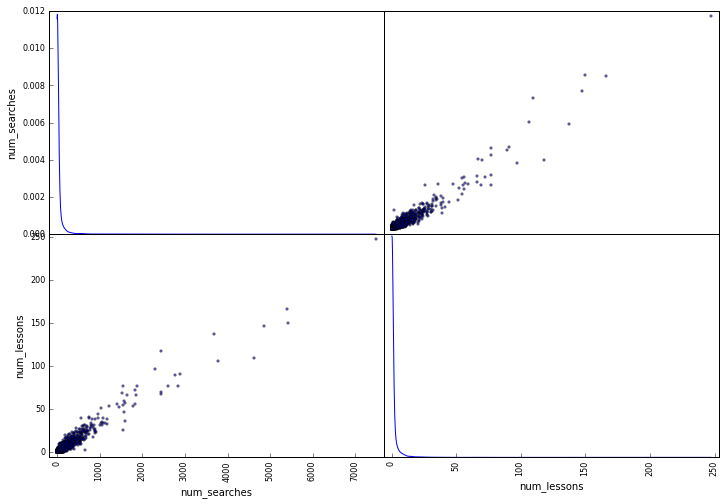

In [120]:
# Plot scatter plot to see variable distribution and if there exist any correlation between the two variables
_ = pd.scatter_matrix(relation_search_lessons, figsize=(12,8), diagonal='kde')

In [121]:
# calculate the correlation coefficient between the two variables 
relation_search_lessons.corr()

,num_searches,num_lessons
num_searches,1.000000,0.967046
num_lessons,0.967046,1.000000


The two variables number of searches ('NumSearchers') and number of lessons ('NumRelationsWithLessons') have a correlation coefficient of 0.967 which tells us that at least from the dataset there is a very strong positive correlation between those variables

#### Which markets are over/underperforming relative to their peers?

To see which markets are over/underperforming, we'll have to rank all the cities in our data. Taking a simple approach here, we wil create a weigted score using these six variables and weight each of the variables equally. ['Population', 'NumSearchers', 'NumSearchClicks', 'NumLeads', 'NumTutorsMailed','NumRelationsWithLessons']


In [135]:
score_data = data[['Population', 'NumSearchers', 'NumSearchClicks', 'NumLeads', 'NumTutorsMailed',
               'NumRelationsWithLessons']].astype(float)
score_data.head()

,Population,NumSearchers,NumSearchClicks,NumLeads,NumTutorsMailed,NumRelationsWithLessons
0,256280,194,354,33,34,6
1,10195,1,1,0,0,0
2,107,2,5,1,0,0
6,7416,22,41,6,4,1
7,31275,2,8,0,0,0


In [136]:
def scale_data(data):  
    minmax_scale = MinMaxScaler(feature_range=(0, 1), copy=True)
    return minmax_scale.fit_transform(data)
  
score_scaled = pd.DataFrame(scale_data(score_data))

In [137]:
## rescale score variable to [0,1]
data['score'] = scale_data(score_scaled.sum(axis =1))

# Remove all cities population less than 200
data = data[data['Population'] > 200]

The table below shows the over performing markets and thair respective score. The range of scores are between 0 and 1. A score of 1 is the maximum score and indicates the best performing market.

In [138]:
data.sort(['score'], ascending=False ).head(10)

,City,State,Population,NumSearchers,AvgNumSearchResults,AvgMinSearchResults,AvgMaxSearchResults,NumSearchClicks,NumLeads,NumTutorsMailed,NumRelationsWithLessons,score
7419,City526,State33,1523621,7481,756.9339,653.0683,885.3510,30779,1503,1429,247,1.000000
10106,City257,State43,3137491,5385,152.8946,137.7167,169.6453,17155,1119,1053,166,0.807676
831,City350,State29,2672718,5410,455.3488,396.1287,525.2817,21751,1158,1076,150,0.804357
2637,City79,State8,2938184,4866,330.3617,291.0800,376.3880,16926,1227,836,147,0.753484
6987,City94,State33,2539231,4622,892.6413,795.3020,1003.2701,16651,909,927,109,0.667722
1797,City201,State3,2408589,3771,128.2959,115.5017,142.0375,10423,819,790,106,0.571896
1040,City559,State29,1316695,3688,171.4560,152.0115,192.4041,11352,658,643,137,0.496532
1048,City567,State29,988864,2889,135.0049,120.6221,151.2160,10815,558,504,91,0.391020
9873,City24,State43,1008490,2440,125.1576,112.7366,139.3946,7659,508,504,118,0.376387
1958,City19,State4,959842,2766,229.2029,201.2128,260.2446,8595,541,505,89,0.369777


The table below shows the under performing markets and thair respective score. The range of scores are between 0 and 1. A score of 0 is the minimum score and indicates the worst performing market.

In [139]:
data.sort(['score'], ascending=False ).tail(10)

,City,State,Population,NumSearchers,AvgNumSearchResults,AvgMinSearchResults,AvgMaxSearchResults,NumSearchClicks,NumLeads,NumTutorsMailed,NumRelationsWithLessons,score
7144,City251,State33,208,1,11,11,11,1,0,0,0,0.000006
7858,City97,State34,208,1,7,7,7,1,0,0,0,0.000006
8498,City116,State36,208,1,11,11,11,1,0,0,0,0.000006
394,City9,State28,207,1,1,1,1,1,0,0,0,0.000006
8020,City259,State34,206,1,4,4,4,1,0,0,0,0.000006
2194,City255,State4,206,1,8,8,8,1,0,0,0,0.000006
2074,City135,State4,205,1,1,1,1,1,0,0,0,0.000006
264,City6,State27,203,1,1,1,1,1,0,0,0,0.000006
3715,CIty106,State11,203,1,38,38,38,1,0,0,0,0.000006
9514,City164,State40,202,1,6,6,6,1,0,0,0,0.000006


#### WyzAnt is launching a new city can you build a predictive model based on this data that provides the expected lesson volume for that city?

Yes, you could build a predictive model to determine lesson volume for a new city. For the new city you would essentially determine which city/cities it is most similar to based on the ten different dimension (features) we have and a distance metric.  